![Pandas Tutorial | Hedaro >](https://www.dropbox.com/s/220ncn0o5danuey/pandas-ipython-tutorials-hedaro.jpg?dl=1)
# Lesson 11

> Grab data from multiple excel files and merge them into a single dataframe.

In [1]:
import pandas as pd
import matplotlib
import os
import sys
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Pandas version 1.3.5
Matplotlib version 3.5.2


# Create 3 excel files

In [3]:
# Create DataFrame
d = {'Channel':[1], 'Number':[255]}
df = pd.DataFrame(d)
df

,Channel,Number
0,1,255


In [4]:
# Export to Excel

df.to_excel('Datafiles/test1.xlsx', sheet_name = 'test1', index = False)
df.to_excel('Datafiles/test2.xlsx', sheet_name = 'test2', index = False)
df.to_excel('Datafiles/test3.xlsx', sheet_name = 'test3', index = False)
print('Done')

Done


# Place all three Excel files into a DataFrame

Get a list of file names but make sure there are no other excel files present in the folder.

In [5]:
# List to hold file names
FileNames = []

# Your path will be different, please modify the path below.
os.chdir(r"Datafiles/")

# Find any file that ends with ".xlsx"
for files in os.listdir("."):
    if files.endswith(".xlsx") and files in ['test1.xlsx', 'test2.xlsx', 'test3.xlsx']:
        FileNames.append(files)
        
FileNames

['test1.xlsx', 'test2.xlsx', 'test3.xlsx']

Create a function to process all of the excel files.

In [6]:
def GetFile(fnombre):

    # Path to excel file
    # Your path will be different, please modify the path below.
    location = r'../DataFiles/' + fnombre
    
    # Parse the excel file
    # 0 = first sheet
    df = pd.read_excel(location, 0)
    
    # Tag record to file name
    df['File'] = fnombre
    
    # Make the "File" column the index of the df
    return df.set_index(['File'])

Go through each file name, create a dataframe, and add it to a list.  

i.e.  
df_list = [df, df, df]

In [7]:
# Create a list of dataframes
df_list = [GetFile(fname) for fname in FileNames]
df_list

[            Channel  Number
 File                       
 test1.xlsx        1     255,
             Channel  Number
 File                       
 test2.xlsx        1     255,
             Channel  Number
 File                       
 test3.xlsx        1     255]

In [8]:
# Combine all of the dataframes into one
big_df = pd.concat(df_list)
big_df

,Channel,Number
File,,
test1.xlsx,1,255
test2.xlsx,1,255
test3.xlsx,1,255


In [9]:
big_df.dtypes

Channel    int64
Number     int64
dtype: object

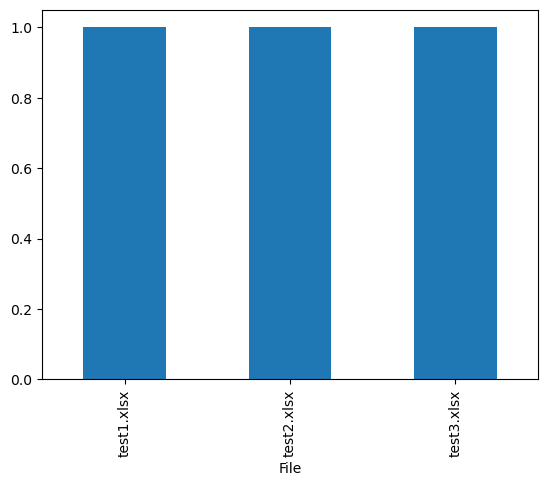

In [10]:
# Plot it!
big_df['Channel'].plot.bar();

<p class="text-muted">This tutorial was created by <a href="http://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>